# Crossref Citation Stats

## Data Provenance

The data was retrieved in January 2018 via the [Crossref API](http://api.crossref.org/works) (the download should include everything at least up to 21st Jan 2018, having started on the 22nd taking up to a week). (The raw responses LZMA zipped take about 32 GB disk space)

## Data Preprocessing

The data was then preprocessed to get calculate some high level stats over the data which are then analysed in this notebook.

The files are available here:
* [crossref-works-summaries-stat.tsv](https://storage.googleapis.com/elife-ml/citations/by-date/2018-01-21/crossref-works-summaries-stat.tsv) - Overall summary stats
* [crossref-works-summaries-by-type-and-publisher-stat.tsv.gz](https://storage.googleapis.com/elife-ml/citations/by-date/2018-01-21/crossref-works-summaries-by-type-and-publisher-stat.tsv.gz) - Summary stats grouped by _type_ and _publisher_ 
* [crossref-works-reference-stat.tsv.gz](https://storage.googleapis.com/elife-ml/citations/by-date/2018-01-21/crossref-works-reference-stat.tsv.gz) - Stats relating to open access (oa) references

## Notes

The *reference\_count* and *referenced\_by\_count* are counts provided by Crossref. *num\_references* are the number of references that are actually accessible via the API (i.e. oa).

## Scripts

The scripts can be found in [this repository](https://github.com/elifesciences/datacapsule-crossref), see [README](https://github.com/elifesciences/datacapsule-crossref/blob/analysis/README.md). Using those scripts the data can be updated (but it will take some time to retrieve all of the Crossref data).

In [1]:
%matplotlib inline

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
plt.style.use('ggplot')

In [4]:
data_path = '../data'
summary_stats_filename = 'crossref-works-summaries-stat.tsv'
summary_by_type_and_publisher_stats_filename = 'crossref-works-summaries-by-type-and-publisher-stat.tsv.gz'
reference_stats_filename = 'crossref-works-reference-stat.tsv.gz'

In [5]:
df_summary = pd.read_csv(os.path.join(data_path, summary_stats_filename), sep='\t')

# drop non-numeric stat value 'type' and convert to numeric values
df_summary = df_summary[
    df_summary['stat'] != 'type'
].apply(pd.to_numeric, errors='ignore')

df_summary = df_summary.set_index('stat')
df_summary

,doi,title,reference_count,referenced_by_count,created,type,publisher,container_title,author_count,first_subject_area,subject_areas,has_references,num_references,num_citations_without_doi,num_duplicate_citation_dois,cited_dois,debug
stat,,,,,,,,,,,,,,,,,
count,95116133.0,95116133.0,9.511613e+07,9.511613e+07,95116133.0,95116133.0,95116133.0,95116133.0,9.511613e+07,95116133.0,95116133.0,9.511613e+07,9.511613e+07,9.511613e+07,9.511613e+07,95116133.0,95116133.0
count_non_zero,NaN,NaN,3.888677e+07,3.748913e+07,NaN,NaN,NaN,NaN,7.852498e+07,NaN,NaN,1.961460e+07,1.961460e+07,1.809097e+07,4.658000e+05,NaN,NaN
count_numeric,NaN,NaN,9.511613e+07,9.511613e+07,NaN,NaN,NaN,NaN,7.852498e+07,NaN,NaN,9.511613e+07,9.511613e+07,9.511613e+07,9.511613e+07,NaN,NaN
count_valid,95116133.0,90961026.0,9.511613e+07,9.511613e+07,95116133.0,95114359.0,95114492.0,90106390.0,7.852498e+07,58806066.0,58806066.0,9.511613e+07,9.511613e+07,9.511613e+07,9.511613e+07,95116133.0,95116133.0
count_zero,NaN,NaN,5.622936e+07,5.762700e+07,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,7.550153e+07,7.550153e+07,7.702516e+07,9.465033e+07,NaN,NaN
max,NaN,NaN,2.581400e+04,1.319390e+05,NaN,NaN,NaN,NaN,9.148000e+03,NaN,NaN,1.000000e+00,1.101600e+04,7.242000e+03,1.335000e+03,NaN,NaN
mean,NaN,NaN,1.142987e+01,7.281283e+00,NaN,NaN,NaN,NaN,3.150397e+00,NaN,NaN,2.062174e-01,5.975357e+00,2.653128e+00,1.274589e-02,NaN,NaN
mean_non_zero,NaN,NaN,2.795720e+01,1.847382e+01,NaN,NaN,NaN,NaN,3.150397e+00,NaN,NaN,1.000000e+00,2.897601e+01,1.394924e+01,2.602705e+00,NaN,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN


In [6]:
df_summary['reference_count']['count']

95116133.0

In [7]:
DEFAULT_NUMBER_FORMAT = '{:,.0f}'
format_count = lambda c, number_format=DEFAULT_NUMBER_FORMAT: number_format.format(c)

def show_counts(counts, title='', number_format=DEFAULT_NUMBER_FORMAT, **kwargs):
    if isinstance(counts, list):
        df = pd.DataFrame(counts, columns=['what', 'count']).set_index('what')['count']
    else:
        df = counts
    ax = df.plot(kind='bar', **kwargs)
    for p in ax.patches:
        ax.annotate(
            format_count(p.get_height(), number_format=number_format),
            xy=(p.get_x() + p.get_width() / 2, p.get_height()), xycoords="data",
            va="bottom", ha="center"
        )
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_count(y))) 
    ax.axes.get_xaxis().set_label_text(title)
    ax.margins(y=0.2)

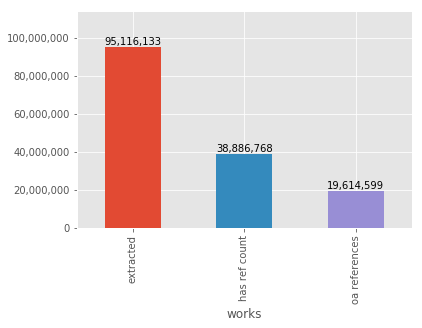

In [8]:
show_counts([
    ['extracted', df_summary['has_references']['count']],
    ['has ref count', df_summary['reference_count']['count_non_zero']],
    ['oa references', df_summary['has_references']['count_non_zero']]
], 'works')

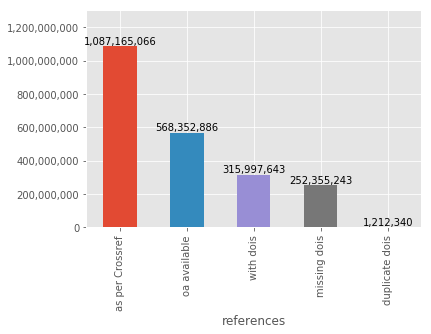

In [9]:
show_counts([
    ['as per Crossref', df_summary['reference_count']['sum']],
    ['oa available', df_summary['num_references']['sum']],
    ['with dois', df_summary['num_references']['sum'] - df_summary['num_citations_without_doi']['sum']],
    ['missing dois', df_summary['num_citations_without_doi']['sum']],
    ['duplicate dois', df_summary['num_duplicate_citation_dois']['sum']]
], 'references')

In [10]:
df_reference_stat = pd.read_csv(os.path.join(data_path, reference_stats_filename), sep='\t')
df_reference_stat['examples'] = df_reference_stat['examples'].map(lambda x: json.loads(x))
df_reference_stat['examples_without_source'] = df_reference_stat['examples'].map(lambda x: [y[1] for y in x])
df_reference_stat = df_reference_stat.sort_values('count', ascending=False)
df_reference_stat.drop('examples', axis=1).head(10)

,type,key,count,examples_without_source
0,key_combination,author|first-page|journal-title|key|volume|year,52325778,"[{'year': '1993', 'volume': '129', 'key': '10...."
813064,year,NaN,48034803,[{'key': '10.1002/(SICI)1096-8628(19960111)61:...
1,key_combination,key|unstructured,41282843,[{'key': '10.1002/(SICI)1096-8628(19970110)68:...
721036,total_first_subject_area,NaN,36267123,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,key_combination,author|first-page|journal-title|key|unstructur...,34857119,"[{'year': '1965', 'unstructured': '1965. ‘A hy..."
3,key_combination,author|key|volume-title|year,28305300,[{'key': '10.1002/(SICI)1096-8628(19970110)68:...
4,key_combination,article-title|author|first-page|journal-title|...,24548731,"[{'year': '1956', 'volume': '60', 'key': '10.1..."
764303,total_publisher,Elsevier BV,15064023,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
82793,non_oa_ref_publisher,Elsevier BV,9980712,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,key_combination,author|key|unstructured|volume-title|year,9646564,[{'key': '10.1002/(SICI)1096-8628(19960102)61:...


In [11]:
set(df_reference_stat['type'].values)

{'key_combination',
 'non_oa_ref_countainer_title',
 'non_oa_ref_created',
 'non_oa_ref_first_subject_area',
 'non_oa_ref_publisher',
 'total_countainer_title',
 'total_created',
 'total_first_subject_area',
 'total_publisher',
 'year'}

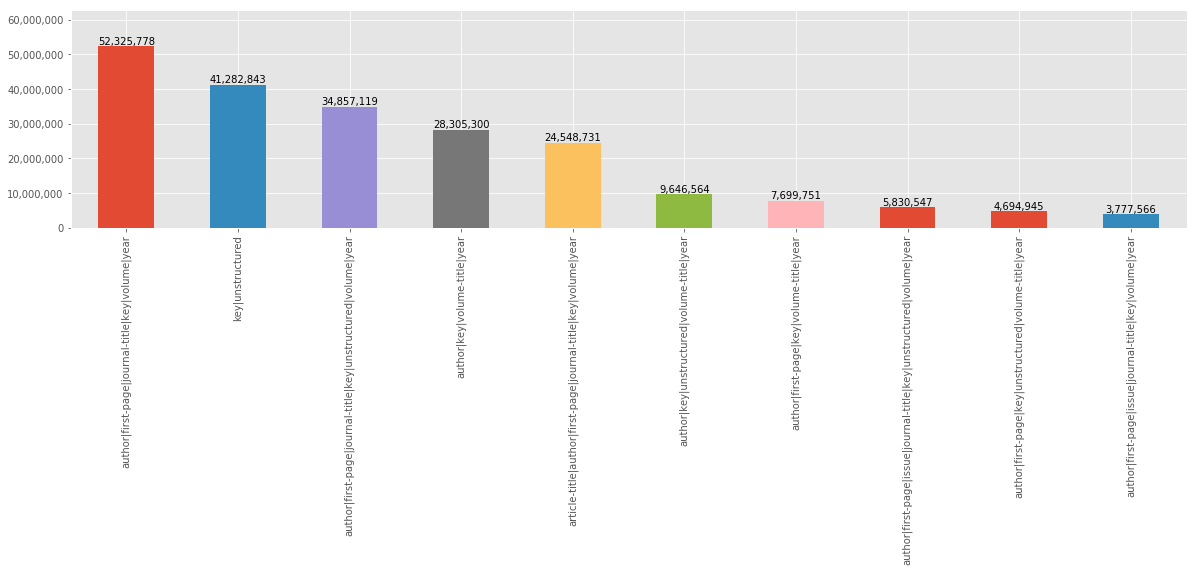

In [12]:
df_reference_key_combination_stat = (
    df_reference_stat[df_reference_stat['type'] == 'key_combination']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_reference_key_combination_stat['count'].head(10), figsize=(20, 4))

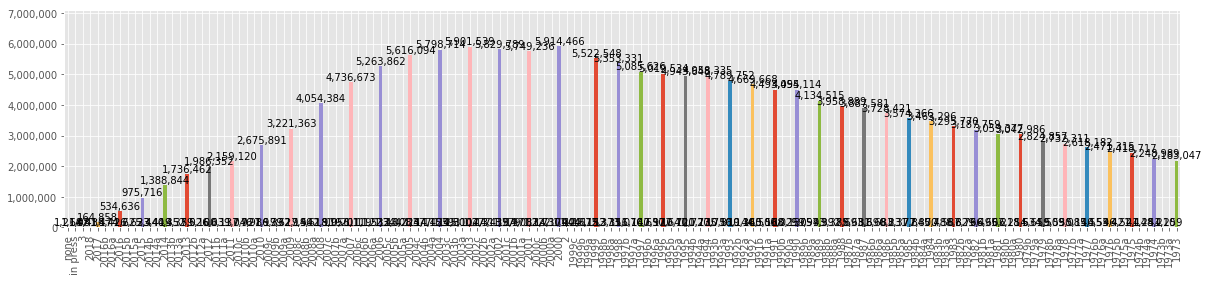

In [13]:
df_reference_year_stat = (
    df_reference_stat[df_reference_stat['type'] == 'year']
    .drop('type', axis=1)
    .sort_values('key', ascending=False)
    .set_index('key')
)
df_reference_year_stat = df_reference_year_stat[df_reference_year_stat['count'] > 1000]
show_counts(df_reference_year_stat['count'].head(150), figsize=(20, 4))

In [14]:
set(df_reference_stat['type'])

{'key_combination',
 'non_oa_ref_countainer_title',
 'non_oa_ref_created',
 'non_oa_ref_first_subject_area',
 'non_oa_ref_publisher',
 'total_countainer_title',
 'total_created',
 'total_first_subject_area',
 'total_publisher',
 'year'}

key
Elsevier BV                                                 0.662553
IEEE                                                        0.874639
Institute of Electrical and Electronics Engineers (IEEE)    0.677360
Elsevier                                                    0.551478
Ovid Technologies (Wolters Kluwer Health)                   0.332248
IOP Publishing                                              0.785181
American Chemical Society (ACS)                             0.289191
Pleiades Publishing Ltd                                     0.962715
The Optical Society                                         0.807777
CRC Press                                                   0.509779
Name: count, dtype: float64


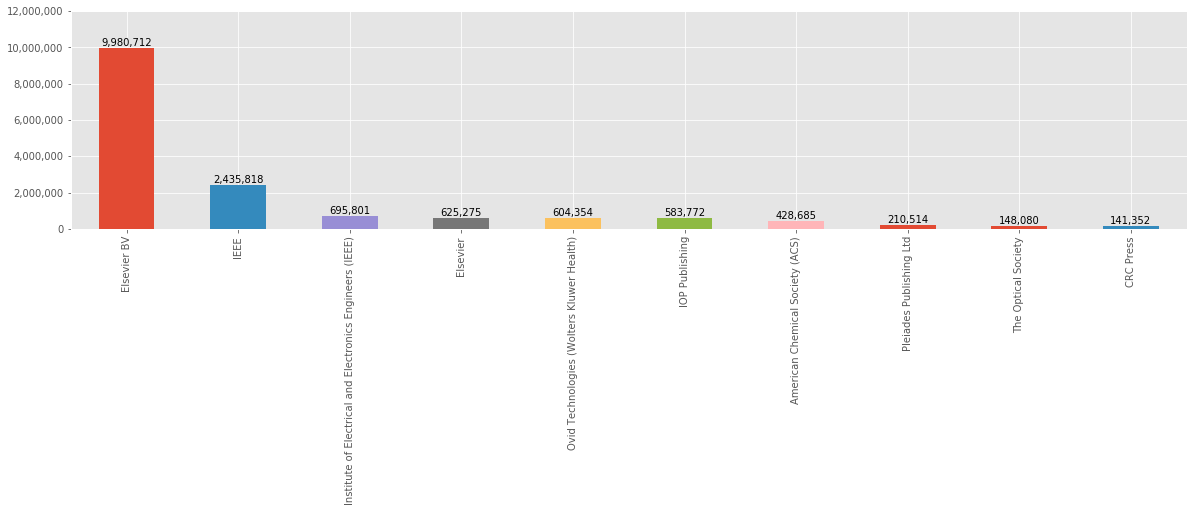

In [15]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_publisher']
    .drop('type', axis=1)
    .set_index('key')
)

df_temp_total = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
# print(df_temp_total.head())
print((df_temp['count'].head(10) / df_temp_total['count']).dropna())
show_counts(df_temp['count'].head(10), figsize=(20, 4))

key
Pleiades Publishing Ltd    0.962715
IEEE                       0.874639
Mary Ann Liebert Inc       0.821458
The Optical Society        0.807777
IOP Publishing             0.785181
Name: count, dtype: float64


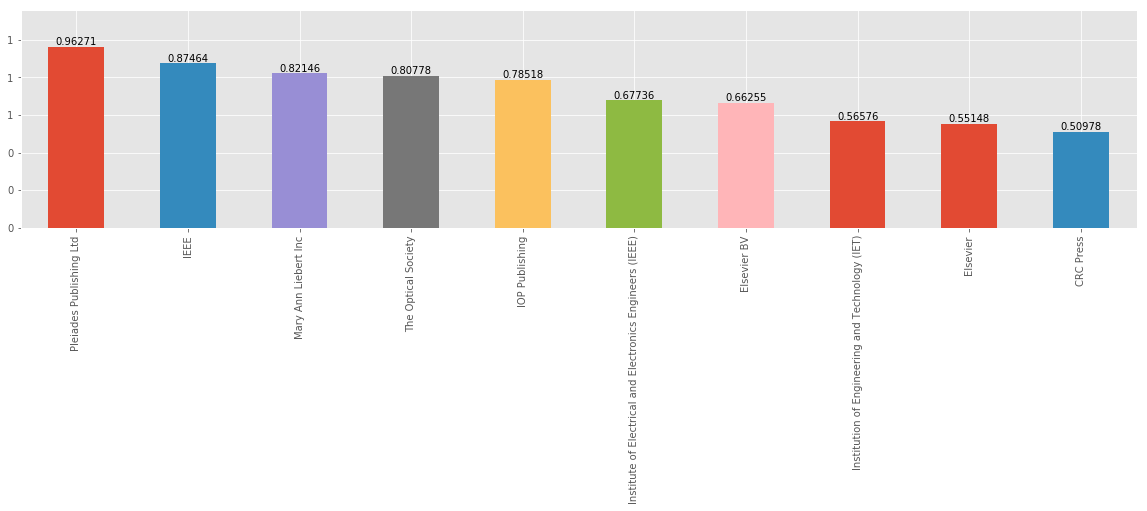

In [16]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp2 = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp = df_temp[df_temp['count'] > 100000]
# df_temp = df_temp[df_temp2['count'] > 10000]
# df_temp2 = df_temp2[df_temp2['count'] > 10000]
df_temp3 = df_temp.copy()
df_temp3['count'] = df_temp3['count'] / df_temp2['count']
print(df_temp3['count'].sort_values(ascending=False).head())
show_counts(df_temp3['count'].sort_values(ascending=False).head(10), number_format='{:,.5f}', figsize=(20, 4))

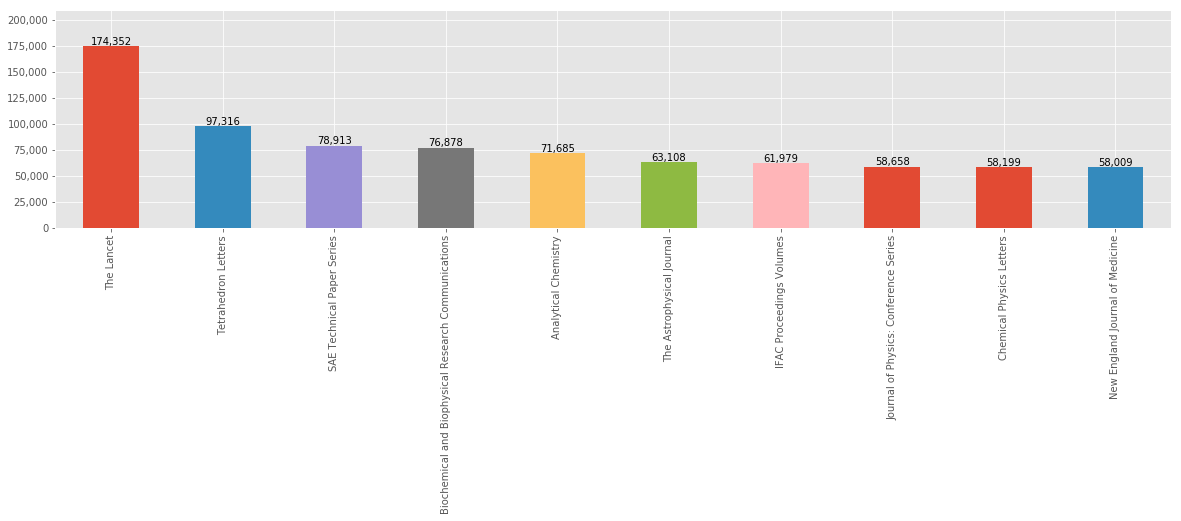

In [17]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_countainer_title']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

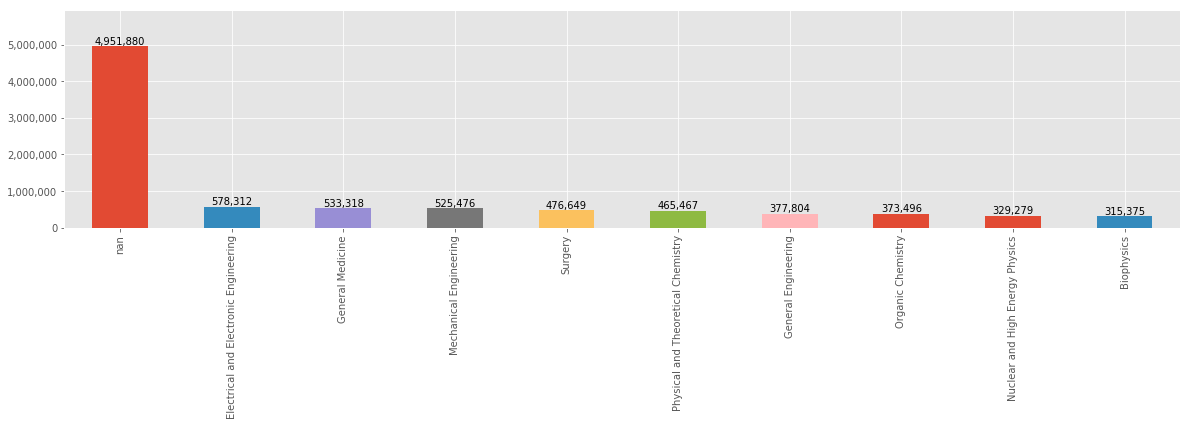

In [18]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_first_subject_area']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

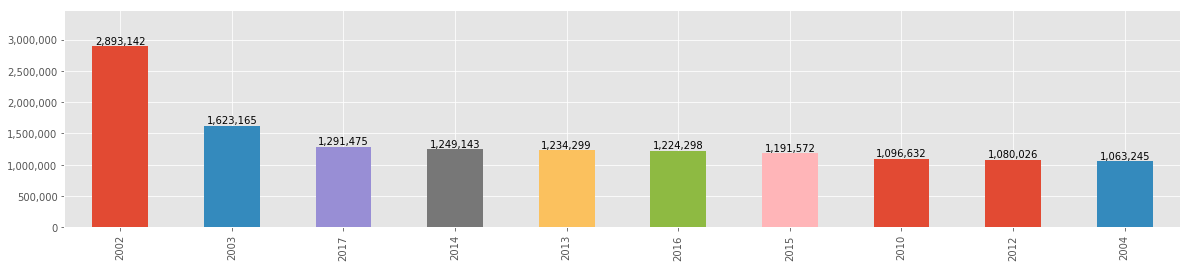

In [19]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_created']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

## More detailed analysis on the summaries by type and publisher

In [20]:
df_summary_by_type_and_publisher = pd.read_csv(
    os.path.join(data_path, summary_by_type_and_publisher_stats_filename), sep='\t'
).rename(columns={
    'reference_count': 'reference_count_crossref',
    'num_references': 'reference_count_oa'
})

# fill na type and publisher with blank (otherwise causes issues with groupby)
df_summary_by_type_and_publisher[['type', 'publisher']] = (
    df_summary_by_type_and_publisher[['type', 'publisher']].fillna('')
)

# drop non-numeric stat value 'type' and convert to numeric values
df_summary_by_type_and_publisher = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] != 'type'
].apply(pd.to_numeric, errors='ignore')

df_summary_by_type_and_publisher.head(3)

,type,publisher,stat,doi,title,reference_count_crossref,referenced_by_count,created,container_title,author_count,first_subject_area,subject_areas,has_references,reference_count_oa,num_citations_without_doi,num_duplicate_citation_dois,cited_dois,debug
0,,,count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,,,count_non_zero,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2,,,count_numeric,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN


In [21]:
# get an overview of the work count by type and publisher
df_summary_by_type_and_publisher_work_counts = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'count'
].groupby(['type', 'publisher'])['doi'].sum().sort_values(ascending=False).to_frame('work_count')

df_summary_by_type_and_publisher_non_zero_counts = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'count_non_zero'
].groupby(['type', 'publisher'])[[
    'reference_count_crossref', 'reference_count_oa'
]].sum().rename(columns={
    'reference_count_crossref': 'has_nonzero_reference_count_crossref',
    'reference_count_oa': 'has_nonzero_reference_count_oa'
})

df_summary_by_type_and_publisher_work_counts = df_summary_by_type_and_publisher_work_counts.merge(
    df_summary_by_type_and_publisher_non_zero_counts, how='outer', left_index=True, right_index=True
).astype(int)

# sanity check
assert int(df_summary_by_type_and_publisher_work_counts.sum()[0]) == int(df_summary['has_references']['count'])

df_summary_by_type_and_publisher_work_counts.sort_values(
    'work_count', ascending=False
).head().applymap(format_count)

work_count  \
type                publisher                        
journal-article     Elsevier BV         15,061,099   
                    Wiley-Blackwell      7,630,283   
                    Springer Nature      7,111,197   
                    Informa UK Limited   3,814,311   
proceedings-article IEEE                 2,775,327   

                                       has_nonzero_reference_count_crossref  \
type                publisher                                                 
journal-article     Elsevier BV                                   9,980,712   
                    Wiley-Blackwell                               5,301,932   
                    Springer Nature                               4,627,852   
                    Informa UK Limited                            2,462,873   
proceedings-article IEEE                                          2,433,668   

                                       has_nonzero_reference_count_oa  
type                publisher                                          
journal-article     Elsevier BV                                     0  
                    Wiley-Blackwell                         5,301,932  
                    Springer Nature                         4,627,852  
                    Informa UK Limited                      2,445,780  
proceedings-article IEEE                                            0

In [22]:
# get total counts
(
    df_summary_by_type_and_publisher_work_counts.reset_index()
    .drop(['type', 'publisher'], axis=1)
    .sum(axis=0)
    .to_frame('total')
    .applymap(format_count)
)

,total
work_count,"95,116,133"
has_nonzero_reference_count_crossref,"38,886,768"
has_nonzero_reference_count_oa,"19,614,599"


In [23]:
# get an overview of the work count by type
(
    df_summary_by_type_and_publisher_work_counts.reset_index().groupby('type')
    .sum().sort_values(by='work_count', ascending=False).head().applymap(format_count)
)

,work_count,has_nonzero_reference_count_crossref,has_nonzero_reference_count_oa
type,,,
journal-article,"70,519,699","33,938,675","18,359,904"
book-chapter,"10,996,021","1,714,074","815,037"
proceedings-article,"5,128,796","2,975,055","232,513"
component,"3,100,303",10,0
dataset,"1,631,995","43,275",12


In [24]:
# treat the type as journal / non-journal article
def type_to_journal_non_journal_article(df):
    df = df.copy()
    df['type'] = df['type'].map(lambda x: 'non-journal-article' if x != 'journal-article' else x)
    return df

(
    type_to_journal_non_journal_article(
        df_summary_by_type_and_publisher_work_counts.reset_index()
    )
    .groupby('type')
    .sum().sort_values(by='work_count', ascending=False).head().applymap(format_count)
)

,work_count,has_nonzero_reference_count_crossref,has_nonzero_reference_count_oa
type,,,
journal-article,"70,519,699","33,938,675","18,359,904"
non-journal-article,"24,596,434","4,948,093","1,254,695"


In [25]:
# by publisher
def select_top_publishers(df, count=5):
    top_publishers = (
        df.groupby('publisher').sum()
        .sort_values(by='work_count', ascending=False)
        .index.values
    )
    return df[df['publisher'].isin(top_publishers[:count])]

(
    type_to_journal_non_journal_article(
        select_top_publishers(df_summary_by_type_and_publisher_work_counts.reset_index())
    )
    .groupby(['type', 'publisher'])
    .sum().sort_values(by='work_count', ascending=False).applymap(format_count)
)

work_count  \
type                publisher                        
journal-article     Elsevier BV         15,061,099   
                    Wiley-Blackwell      7,630,283   
                    Springer Nature      7,111,197   
                    Informa UK Limited   3,814,311   
non-journal-article IEEE                 2,784,942   
                    Wiley-Blackwell        362,628   
                    Springer Nature         19,736   
                    Informa UK Limited       2,965   
                    Elsevier BV              2,924   

                                       has_nonzero_reference_count_crossref  \
type                publisher                                                 
journal-article     Elsevier BV                                   9,980,712   
                    Wiley-Blackwell                               5,301,932   
                    Springer Nature                               4,627,852   
                    Informa UK Limited                            2,462,873   
non-journal-article IEEE                                          2,435,818   
                    Wiley-Blackwell                                  12,959   
                    Springer Nature                                       0   
                    Informa UK Limited                                    0   
                    Elsevier BV                                           0   

                                       has_nonzero_reference_count_oa  
type                publisher                                          
journal-article     Elsevier BV                                     0  
                    Wiley-Blackwell                         5,301,932  
                    Springer Nature                         4,627,852  
                    Informa UK Limited                      2,445,780  
non-journal-article IEEE                                            0  
                    Wiley-Blackwell                            12,959  
                    Springer Nature                                 0  
                    Informa UK Limited                              0  
                    Elsevier BV                                     0

In [26]:
def normalise_publisher(df):
    elsevier_names = [
        s for s in df['publisher'].unique()
        if not pd.isnull(s) and 'elsevier' in s.lower()
    ]
    return df.replace({
        'publisher': {s: 'Elsevier (all)' for s in elsevier_names}
    })

# by normalised publisher
(
    select_top_publishers(normalise_publisher(type_to_journal_non_journal_article(
        df_summary_by_type_and_publisher_work_counts.reset_index()
    )))
    .groupby(['type', 'publisher'])
    .sum().sort_values(by='work_count', ascending=False).applymap(format_count)
)

work_count  \
type                publisher                        
journal-article     Elsevier (all)      15,061,099   
                    Wiley-Blackwell      7,630,283   
                    Springer Nature      7,111,197   
                    Informa UK Limited   3,814,311   
non-journal-article IEEE                 2,784,942   
                    Elsevier (all)       1,136,928   
                    Wiley-Blackwell        362,628   
                    Springer Nature         19,736   
                    Informa UK Limited       2,965   

                                       has_nonzero_reference_count_crossref  \
type                publisher                                                 
journal-article     Elsevier (all)                                9,980,712   
                    Wiley-Blackwell                               5,301,932   
                    Springer Nature                               4,627,852   
                    Informa UK Limited                            2,462,873   
non-journal-article IEEE                                          2,435,818   
                    Elsevier (all)                                  625,692   
                    Wiley-Blackwell                                  12,959   
                    Springer Nature                                       0   
                    Informa UK Limited                                    0   

                                       has_nonzero_reference_count_oa  
type                publisher                                          
journal-article     Elsevier (all)                                  0  
                    Wiley-Blackwell                         5,301,932  
                    Springer Nature                         4,627,852  
                    Informa UK Limited                      2,445,780  
non-journal-article IEEE                                            0  
                    Elsevier (all)                                417  
                    Wiley-Blackwell                            12,959  
                    Springer Nature                                 0  
                    Informa UK Limited                              0

In [27]:
# sanity check, the grouped summary should equal the ungrouped summary
df_summary_by_type_and_publisher_sums = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'sum'
]
total_reference_count_according_to_crossref = df_summary_by_type_and_publisher_sums['reference_count_crossref'].sum()
assert total_reference_count_according_to_crossref == df_summary['reference_count']['sum']
(
    df_summary_by_type_and_publisher_sums[['reference_count_crossref', 'reference_count_oa']]
    .sum()
    .map(format_count)
    .to_frame('sum')
)

,sum
reference_count_crossref,"1,087,165,066"
reference_count_oa,"568,352,886"


In [28]:
# total references by type
(
    df_summary_by_type_and_publisher_sums.groupby('type')
    [['reference_count_crossref', 'reference_count_oa']]
    .sum()
    .sort_values('reference_count_crossref', ascending=False)
    .head()
    .applymap(format_count)
)

,reference_count_crossref,reference_count_oa
type,,
journal-article,"963,169,791","527,834,070"
book-chapter,"78,419,418","30,139,698"
proceedings-article,"38,682,602","3,823,322"
reference-entry,"6,213,912","6,213,912"
other,"315,968","188,901"


In [29]:
# Publishers with the highest amount of references
(
    df_summary_by_type_and_publisher_sums.groupby('publisher')
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head().applymap(format_count)

,reference_count_crossref,reference_count_oa
publisher,,
Elsevier BV,"298,193,796",0
Wiley-Blackwell,"142,988,200","142,988,200"
Springer Nature,"130,030,287","130,030,287"
Informa UK Limited,"69,656,139","69,273,929"
Elsevier,"36,700,555","14,856"


In [30]:
# Elsevier uses mutliple names, treat them as one
elsevier_names = [
    s for s in df_summary_by_type_and_publisher_sums['publisher'].unique()
    if not pd.isnull(s) and 'elsevier' in s.lower()
]
print(elsevier_names)
df_summary_by_type_and_publisher_sums_merged_publisher = (
    df_summary_by_type_and_publisher_sums.replace({
        'publisher': {s: 'Elsevier (all)' for s in elsevier_names}
    })
)

['Elsevier', 'Elsevier IFAC', 'Elsevier, IFAC', 'IFAC, Elsevier', 'Elsevier, Germany', 'Elsevier BV', '"Elsevier",', 'Elsevier Masson', 'Elsevier Pub. Co.', 'Elsevier Pub. Co.,', 'Elsevier,', 'Publishing company "Elsevier,",']


In [31]:
# Publishers with the highest amount of references - this time with merged publisher names
(
    df_summary_by_type_and_publisher_sums_merged_publisher.groupby('publisher')
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head().applymap(format_count)

,reference_count_crossref,reference_count_oa
publisher,,
Elsevier (all),"334,894,351","14,856"
Wiley-Blackwell,"142,988,200","142,988,200"
Springer Nature,"130,030,287","130,030,287"
Informa UK Limited,"69,656,139","69,273,929"
IEEE,"31,162,368",0


In [32]:
# Publishers with the highest amount of references (by type) - this time with merged publisher names
(
    df_summary_by_type_and_publisher_sums_merged_publisher.groupby(['type', 'publisher'])
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head().applymap(format_count)

reference_count_crossref reference_count_oa
type            publisher                                                     
journal-article Elsevier (all)                  298,193,796                  0
                Wiley-Blackwell                 142,098,711        142,098,711
                Springer Nature                 130,030,287        130,030,287
                Informa UK Limited               69,656,139         69,273,929
book-chapter    Elsevier (all)                   36,700,555             14,856